In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Exercises from other sources  

## 1

### a.

We want to find the probability that a European call option will be exercised. This means we are looking for $P(S_T > K)$.

First, let's calculate the mean and variance of the normal distribution:

Mean:
$$ln S_0 + \left(\mu - \frac{\sigma^2}{2}\right)T = ln(38) + \left(0.16 - \frac{0.35^2}{2}\right) \cdot 0.5 \\ \approx 3.6870$$

Variance:
$$\sigma^2 T = 0.35^2 \cdot 0.5 = 0.06125$$

Standard Deviation:
$$\sigma \sqrt{T} = 0.35 \cdot \sqrt{0.5} \approx 0.2475$$

Now, define Z

$$Z = \frac{ln(K) - (ln(S_0) + (\mu - \frac{\sigma^2}{2}) \cdot T)}{\sigma \cdot \sqrt{T}}$$

$$Z = \frac{ln(40) - 3.6870}{0.2475} \approx \frac{3.6889 - 3.6870}{0.2475} \approx 0.0077$$

The probability that the call option is exercised can be shown by using this:

$$P(S_T > K) = P\left(ln(S_T) > ln(K)\right) = 1 - N(Z)$$
where $N(Z)$ is the cumulative distribution function of the standard normal distribution.

$$P(S_T > K) = 1 - N(0.0077)$$

Running the following python code and calculating N(0.0077) gives $P(S_T > K) \approx 0.4969$.

In [26]:
z = 0.0077
prob = 1 - st.norm.cdf(z)
# print(prob)

### b.

For the European put option, we want to find $P(S_T < K)$.

$P(S_T < K) = N(Z)$, using same $Z$ calculation for part (a).
$$P(S_T < K) = N(0.0077) \approx 0.5031$$

Running python code gives $P(S_T < K) \approx 0.5031$.


In [27]:
z = 0.0077
prob = st.norm.cdf(z)
# print(prob)

## 2

In [28]:
n_paths = 100
n_steps = 252  # Assuming daily steps for a year 
T = 1  # Time horizon
dt = T / n_steps
t = np.linspace(0, T, n_steps)

### a)

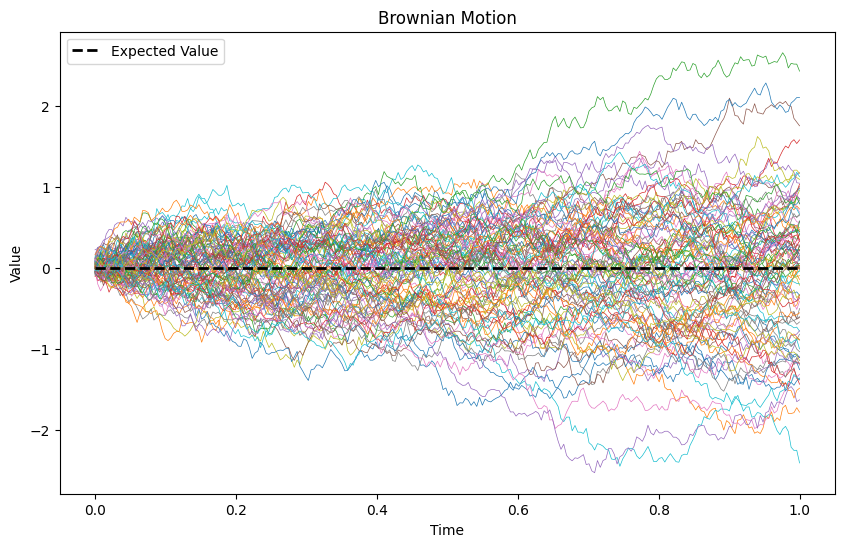

In [29]:
dW = np.random.normal(0, np.sqrt(dt), (n_paths, n_steps))
W = np.cumsum(dW, axis=1)

expected_W = np.zeros(n_steps)

plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(t, W[i, :], lw=0.5)
plt.plot(t, expected_W, 'k--', lw=2, label='Expected Value')
plt.title('Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### b)

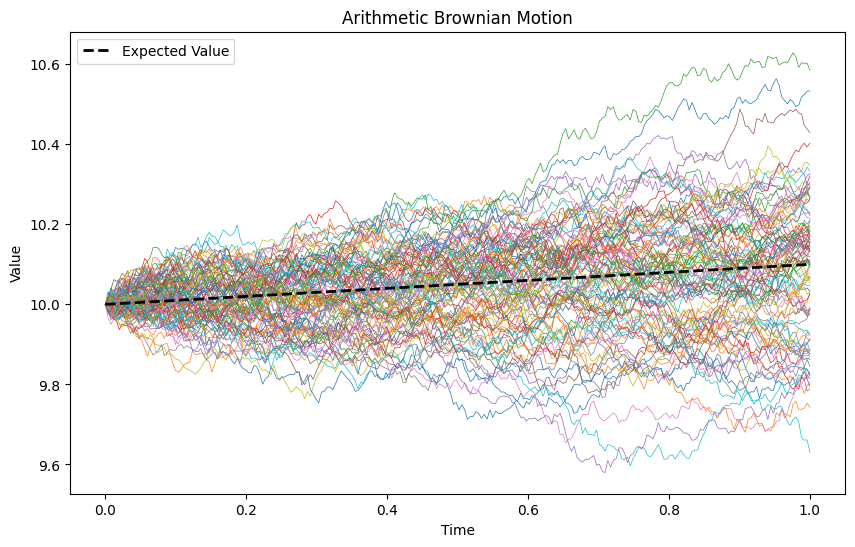

In [30]:
mu = 0.1
sigma = 0.2
X0 = 10
X = np.zeros((n_paths, n_steps))
X[:, 0] = X0
for i in range(n_paths):
    for j in range(1, n_steps):
        X[i, j] = X[i, j - 1] + mu * dt + sigma * dW[i, j]
# Expected Value
expected_X = X0 + mu * t

plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(t, X[i, :], lw=0.5)
plt.plot(t, expected_X, 'k--', lw=2, label='Expected Value')
plt.title('Arithmetic Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### c)

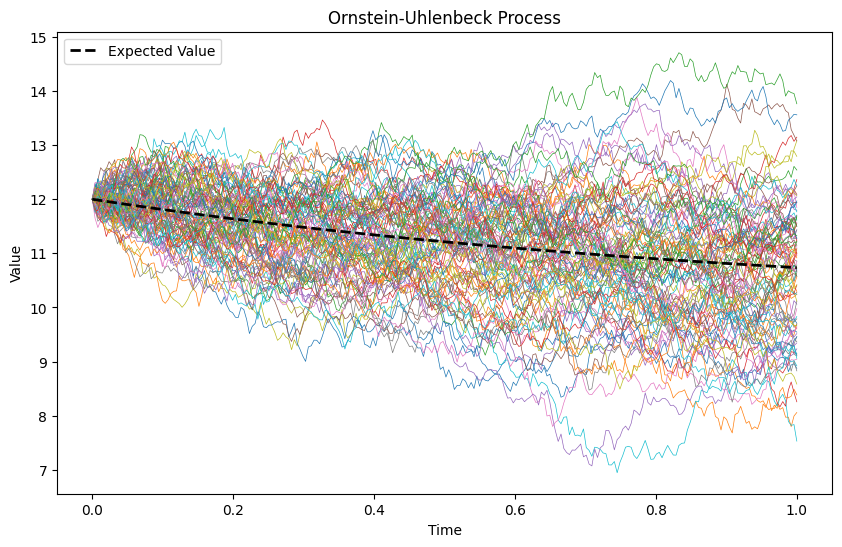

In [31]:
theta = 1  # Speed of reversion
mu_ou = 10 # Long-term mean
sigma_ou = 2  # Volatility
X_ou = np.zeros((n_paths, n_steps))
X_ou[:, 0] = 12  # Initial Value

for i in range(n_paths):
    for j in range(1, n_steps):
        X_ou[i, j] = X_ou[i, j - 1] + theta * (mu_ou - X_ou[i, j - 1]) * dt + sigma_ou * dW[i, j]
# Expected value
expected_ou = mu_ou + (X_ou[0,0] - mu_ou) * np.exp(-theta*t)
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(t, X_ou[i, :], lw=0.5)
plt.plot(t, expected_ou, 'k--', lw=2, label='Expected Value')
plt.title('Ornstein-Uhlenbeck Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### d)

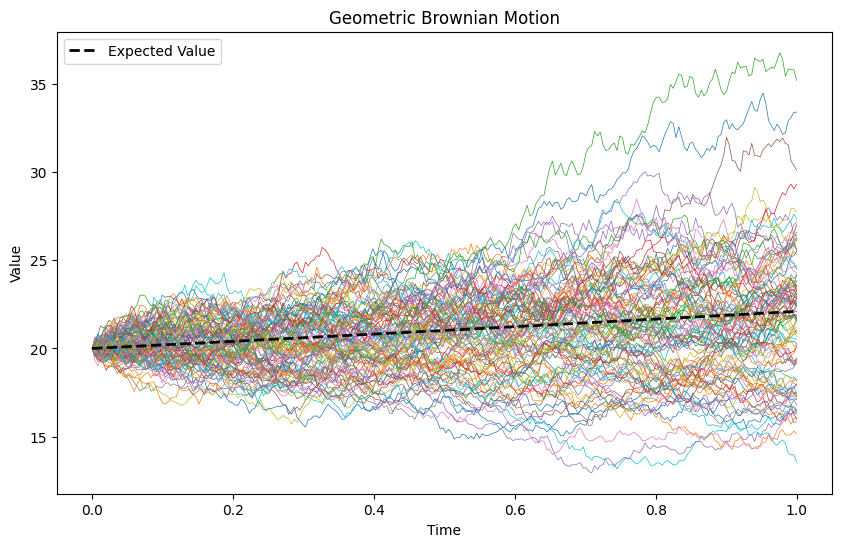

In [32]:
mu_gbm = 0.1
sigma_gbm = 0.2
S0 = 20
S = np.zeros((n_paths, n_steps))
S[:, 0] = S0

for i in range(n_paths):
    for j in range(1, n_steps):
        S[i, j] = S[i, j - 1] * np.exp((mu_gbm - 0.5 * sigma_gbm**2) * dt + sigma_gbm * dW[i, j])
# Expected value
expected_gbm = S0 * np.exp(mu_gbm * t)
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(t, S[i, :], lw=0.5)
plt.plot(t, expected_gbm, 'k--', lw=2, label='Expected Value')
plt.title('Geometric Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## 3

### 3.1

Given:

*   $dS = (r - \delta_S)Sdt + \sigma_S S dZ_S$
*   $dQ = (r - \delta_Q)Qdt + \sigma_Q Q dZ_Q$

Let $F(S, Q) = S^2 Q^{0.5}$. We want to find $dF$. Using Ito's Lemma for two variables:

$$dF = \left(\frac{\partial F}{\partial S}\frac{dS}{dt} + \frac{\partial F}{\partial Q}\frac{dQ}{dt} + \frac{1}{2}\frac{\partial^2 F}{\partial S^2}\frac{dS^2}{dt} + \frac{1}{2}\frac{\partial^2 F}{\partial Q^2}\frac{dQ^2}{dt} + \frac{\partial^2 F}{\partial S \partial Q}\frac{d[S,Q]}{dt} \right) dt \\ + \frac{\partial F}{\partial S}dZ_s + \frac{\partial F}{\partial Q} dZ_Q$$
Calculate the partial derivatives:

*   $\frac{\partial F}{\partial S} = 2SQ^{0.5}$
*   $\frac{\partial F}{\partial Q} = 0.5S^2Q^{-0.5}$
*   $\frac{\partial^2 F}{\partial S^2} = 2Q^{0.5}$
*   $\frac{\partial^2 F}{\partial Q^2} = -0.25S^2Q^{-1.5}$
*   $\frac{\partial^2 F}{\partial S \partial Q} = S Q^{-0.5}$

Also get the variances:
* $dS^2 = \sigma_S^2 S^2 dt$
* $dQ^2 = \sigma_Q^2 Q^2 dt$
* $d[S, Q] = \rho_{S, Q}\sigma_S S \sigma_Q Q dt$

Now, substitute these into Ito's Lemma:

\begin{tiny}
$$dF = \left(2SQ^{0.5}(r - \delta_S)S + 0.5S^2Q^{-0.5}(r - \delta_Q)Q + \frac{1}{2} \cdot 2Q^{0.5}\sigma_S^2S^2 + \frac{1}{2} \cdot (-0.25)S^2Q^{-1.5}\sigma_Q^2Q^2 + SQ^{-0.5}\rho_{S, Q}\sigma_S S \sigma_Q Q  \right)dt$$
$$+ 2 S Q^{0.5} \sigma_s S dZ_S +  0.5 S^2 Q^{-0.5} \sigma_Q Q dZ_Q$$
\end{tiny}

Simplify:

$$dF = \left(2(r - \delta_S)S^2Q^{0.5} + 0.5(r - \delta_Q)S^2Q^{0.5} + \sigma_S^2S^2Q^{0.5} - 0.125\sigma_Q^2S^2Q^{0.5} + \rho_{S, Q}\sigma_S\sigma_QS^2Q^{0.5} \right)dt$$
$$+ 2\sigma_SS^2Q^{0.5}dZ_S + 0.5\sigma_QS^2Q^{0.5}dZ_Q$$

$$dF = S^2Q^{0.5}\left(2(r - \delta_S) + 0.5(r - \delta_Q) + \sigma_S^2 - 0.125\sigma_Q^2 + \rho_{S, Q}\sigma_S\sigma_Q \right)dt + S^2Q^{0.5}\left(2\sigma_SdZ_S + 0.5\sigma_QdZ_Q\right)$$

### 3.2

Given the same processes for S and Q, let $G(S, Q) = ln(SQ) = ln(S) + ln(Q)$. We need to find dG.

Calculate the partial derivatives:

* $\frac{\partial G}{\partial S} = \frac{1}{S}$
*   $\frac{\partial G}{\partial Q} = \frac{1}{Q}$
*   $\frac{\partial^2 G}{\partial S^2} = -\frac{1}{S^2}$
*   $\frac{\partial^2 G}{\partial Q^2} = -\frac{1}{Q^2}$
*    $\frac{\partial^2 G}{\partial S \partial Q} = 0$

Applying Ito's Lemma:

$$dG = \left( \frac{1}{S}(r - \delta_S) S + \frac{1}{Q}(r - \delta_Q) Q + \frac{1}{2} * (\frac{-1}{S^2}) \sigma_S^2 S^2 + \frac{1}{2} (\frac{-1}{Q^2}) * \sigma^2_Q Q^2 + 0 \right)dt \\ + \frac{1}{S}\sigma_S S dZ_S + \frac{1}{Q} \sigma_Q Q dZ_Q$$
$$dG = \left((r - \delta_S) + (r - \delta_Q) - \frac{1}{2}\sigma_S^2 - \frac{1}{2}\sigma_Q^2\right)dt + \sigma_S dZ_S + \sigma_Q dZ_Q$$
$$dG = \left(2r - \delta_S - \delta_Q - \frac{1}{2}\sigma_S^2 - \frac{1}{2}\sigma_Q^2\right)dt + \sigma_S dZ_S + \sigma_Q dZ_Q$$

### 3.3

#### 3.3.1

Given:
*   $dS_1 = \alpha_1 S_1 dt + \sigma_1 S_1 dZ_1$
*   $dS_2 = \alpha_2 S_2 dt + \sigma_2 S_2 dZ_2$
*   $dQ = \alpha_Q Q dt + Q(\eta_1 dZ_1 + \eta_2 dZ_2)$

From the equation for $dQ$, the expected return on Q is simply $\alpha_Q$. The diffusion terms ($dZ_1$ and $dZ_2$) have expected values of zero.

#### 3.3.2

Create a portfolio, $\Pi$:

*   +1 unit of Q
*   $-\frac{Q\eta_1}{S_1\sigma_1}$ units of $S_1$
*   $-\frac{Q\eta_2}{S_2\sigma_2}$ units of $S_2$
*   Finance any net cost with risk-free bonds, $B$, earning interest at rate $r$.

The change in the portfolio value, $d\Pi$, is:

$$d\Pi = dQ - \frac{Q\eta_1}{S_1\sigma_1}dS_1 - \frac{Q\eta_2}{S_2\sigma_2}dS_2 + r\left(\frac{Q\eta_1}{\sigma_1} + \frac{Q\eta_2}{\sigma_2} - Q\right)dt$$

Substitute the expressions for $dQ$, $dS_1$, and $dS_2$:
$$d\Pi = [\alpha_Q Q dt + Q(\eta_1 dZ_1 + \eta_2 dZ_2)] - \frac{Q\eta_1}{S_1\sigma_1}[\alpha_1 S_1 dt + \sigma_1 S_1 dZ_1] - \\ \frac{Q\eta_2}{S_2\sigma_2}[\alpha_2 S_2 dt + \sigma_2 S_2 dZ_2] +rQ(\frac{\eta_1}{\sigma_1} + \frac{\eta_2}{\sigma_2}-1)dt$$

Simplify:

$$d\Pi = \left[\alpha_Q Q - \frac{Q\eta_1\alpha_1}{\sigma_1} - \frac{Q\eta_2\alpha_2}{\sigma_2} + rQ\left(\frac{\eta_1}{\sigma_1} + \frac{\eta_2}{\sigma_2} - 1\right)\right]dt + Q\eta_1 dZ_1 + Q\eta_2 dZ_2 - Q\eta_1 dZ_1 - Q\eta_2 dZ_2$$

Notice that the $dZ_1$ and $dZ_2$ terms cancel out.  This portfolio is now risk-free.  To avoid arbitrage, the return on this risk-free portfolio must equal the risk-free rate.  Therefore, the coefficient of $dt$ must be zero:

$$\alpha_Q Q - \frac{Q\eta_1\alpha_1}{\sigma_1} - \frac{Q\eta_2\alpha_2}{\sigma_2} + rQ\left(\frac{\eta_1}{\sigma_1} + \frac{\eta_2}{\sigma_2} - 1\right) = 0$$

Divide by $Q$:

$$\alpha_Q - \frac{\eta_1\alpha_1}{\sigma_1} - \frac{\eta_2\alpha_2}{\sigma_2} + r\left(\frac{\eta_1}{\sigma_1} + \frac{\eta_2}{\sigma_2}\right) - r = 0$$

Rearrange to get the desired result:

$$\alpha_Q - r = \frac{\eta_1}{\sigma_1}(\alpha_1 - r) + \frac{\eta_2}{\sigma_2}(\alpha_2 - r)$$

This is the no-arbitrage condition.

# Exam problem

## a.

The given model is:

$\Delta S = \mu S \Delta t + \sigma S \epsilon \sqrt{\Delta t}$  (*)

This is a discrete-time approximation of geometric Brownian motion (GBM).

1.  **$\Delta S = \mu \Delta t + \sigma \epsilon \sqrt{\Delta t}$**

    *   This is a discrete-time approximation of *arithmetic* Brownian motion. The key difference is that the *absolute* change in price ($\Delta S$) is normally distributed, *not* the percentage change. The drift and volatility terms are independent of the current stock price, *S*. This is a bad idea, as the stock price could be negative.
2.  **$\Delta S = \mu S \Delta t + \sigma \epsilon \sqrt{\Delta t}$**

    *   In this model, the drift term is proportional to the stock price (which is good), but the volatility term is *not*. This means the magnitude of the random fluctuations is independent of the stock price. This is unrealistic. A \$100 stock and a \$10 stock would have the same *absolute* price fluctuations, which is not observed.
3.  **$\Delta S = \mu \Delta t + \sigma S \epsilon \sqrt{\Delta t}$**

    *   Here, the volatility term is proportional to the stock price (which is good), but the drift term is *not*. This implies that the expected *absolute* change in price is constant, regardless of the stock's price. Again, unrealistic. A higher-priced stock should have a higher expected *absolute* price increase (in dollars) than a lower-priced stock, assuming the same percentage growth.

Model (\*) is preferred because its drift and volatility are both proportional to the current stock price, *S*. This structure accurately reflects two important characteristics of stock prices. First, it accounts for compounding returns, where the expected *percentage* change in price, represented by $\mu\Delta t$, remains constant, rather than the absolute change. Thus, a 10% increase results in a \$10 gain for a \$100 stock and a \$1 gain for a \$10 stock, illustrating the compounding effect. Second, the model incorporates volatility scaling. The model expresses that the random fluctuations, or volatility, scale with the stock price. In the real world, this explains why bigger prices have higher price swings. Additionally, this proportional scaling ensures the stock price cannot become negative. Therefore, model (\*) indicates that percentage changes in the stock price follow a normal distribution. Which is better than assuming the absolute changes are distributed normally.

## b.

Let $S_A$ and $S_B$ be the prices of stock A and stock B, respectively, both following GBM:

*   $dS_A = \mu_A S_A dt + \sigma_A S_A dZ_A$
*   $dS_B = \mu_B S_B dt + \sigma_B S_B dZ_B$

Let $P = S_A + S_B$ be the portfolio value. Then:

$$dP = dS_A + dS_B = (\mu_A S_A + \mu_B S_B)dt + \sigma_A S_A dZ_A + \sigma_B S_B dZ_B$$

For *P* to follow GBM, we would need $dP$ to have the form:

$$dP = \mu_P P dt + \sigma_P P dZ_P$$
or
$$dP = \mu_P (S_A + S_B) dt + \sigma_P (S_A+ S_B) dZ_P$$

However, the equation does not have same form, as the coefficients of the wiener processes and dW are dependent.

Therefore, the portfolio *P* does **not** follow a geometric Brownian motion, even though the individual stocks do. The sum of two lognormally distributed variables is not lognormally distributed.

## c.

Given:

* $dS = \mu S dt + \sigma S dZ$
*   $y = e^{\alpha S}$

We use Ito's Lemma: $dy = \frac{\partial y}{\partial t} dt + \frac{\partial y}{\partial S} dS + \frac{1}{2}\frac{\partial^2 y}{\partial S^2}(dS)^2$

Calculate the partial derivatives:

*   $\frac{\partial y}{\partial t} = 0$
*   $\frac{\partial y}{\partial S} = \alpha e^{\alpha S} = \alpha y$
*   $\frac{\partial^2 y}{\partial S^2} = \alpha^2 e^{\alpha S} = \alpha^2 y$
* $(dS)^2 = \sigma^2S^2dt$

Substitute into Ito's Lemma:
$$dy = 0 \cdot dt+ \alpha y (\mu S dt + \sigma S dZ) + \frac{1}{2}\alpha^2 y \sigma^2 S^2 dt$$

$$dy = \alpha y \mu S dt + \alpha y \sigma S dZ + \frac{1}{2} \alpha^2 \sigma^2 S^2 y dt$$
$$dy = (\alpha \mu S y + \frac{1}{2}\alpha^2 \sigma^2 S^2 y)dt + \alpha \sigma S y dZ$$
Since $y = e^{\alpha S}$, then $S = \frac{ln(y)}{\alpha}$:
$$dy = y (\mu ln(y) + \frac{1}{2}\alpha \sigma^2 \frac{(ln(y))^2}{\alpha^2})dt + \sigma y ln(y) dZ$$
$$dy= y (\mu ln(y) + \frac{1}{2} \sigma^2 (ln y)^2)dt + \sigma ln(y) y dZ$$

The process followed by *y* is *not* a geometric Brownian motion. It's a more complex process with drift and volatility terms that depend on ln(*y*).